In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Importing Data

In [3]:
train=pd.read_csv("data/B5_customer_churn_train.csv")
train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Income,Cluster_Label,Geography,Gender,Card Type,Exited
0,808,25,7,0.000000,2,0,1,23180.370000,4,387,20552,2,2.000000,1.000000,1.000000,0
1,808,25,7,0.000000,2,0,1,23180.370000,4,387,20881,2,2.000000,1.000000,1.000000,0
2,561,56,7,152759.000000,2,1,0,133167.110000,2,377,134496,2,0.000000,1.000000,1.000000,1
3,561,56,7,152759.000000,2,1,0,133167.110000,2,377,130441,2,0.000000,1.000000,1.000000,1
4,561,56,7,152759.000000,2,1,0,133167.110000,2,377,136810,2,0.000000,1.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29561,522,46,6,0.000000,1,0,0,148202.918655,2,469,141648,3,0.000000,0.000000,1.053530,1
29562,734,46,7,141467.165046,1,1,0,93574.978986,5,677,94719,3,0.839605,0.000000,0.000000,1
29563,582,36,2,0.000000,1,1,0,98794.037747,1,611,99688,1,0.000000,0.118976,0.000000,1
29564,483,51,3,134876.324516,1,0,0,49650.079372,2,722,40300,2,1.000000,1.000000,1.000000,1


In [4]:
test=pd.read_csv("data/B5_customer_churn_test.csv")
test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Income,Cluster_Label,Geography,Gender,Card Type
0,729,36,8,109106.80,1,0,0,121311.12,0,3,456,127123,4,0.0,0.0,0.0
1,729,36,8,109106.80,1,0,0,121311.12,0,3,456,125528,3,0.0,0.0,0.0
2,729,36,8,109106.80,1,0,0,121311.12,0,3,456,127619,1,0.0,0.0,0.0
3,729,36,8,109106.80,1,0,0,121311.12,0,3,456,128305,3,0.0,0.0,0.0
4,565,34,6,0.00,1,1,1,63173.64,0,5,244,65310,0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,849,69,7,71996.09,1,1,1,139065.94,0,2,317,134451,0,0.0,1.0,1.0
3385,849,69,7,71996.09,1,1,1,139065.94,0,2,317,132448,0,0.0,1.0,1.0
3386,734,33,5,121898.58,1,1,0,61829.89,0,4,659,64621,0,1.0,1.0,2.0
3387,683,29,9,0.00,2,1,1,48849.89,0,3,468,46571,4,0.0,0.0,1.0


In [4]:
X_train=train.drop("Exited", axis=1)
y_train=train["Exited"].astype("category")

In [5]:
X_test=test.drop("Exited",axis=1)
y_test=test["Exited"].astype("category")

# Model Training and Comparison

## Logistic Regression

In [6]:
scaler = StandardScaler()
X_train_lr=scaler.fit_transform(X_train)
lr = LogisticRegression(max_iter=500)

In [7]:
lr.fit(X_train_lr, y_train)

LogisticRegression(max_iter=500)

In [8]:
X_test_lr=scaler.transform(X_test)
y_pred_lr = lr.predict(X_test_lr)

In [9]:
confusion_matrix(y_test, y_pred=y_pred_lr)

array([[1902,  793],
       [ 225,  469]])

In [10]:
print(classification_report(y_test, y_pred_lr, digits=4))
print("Accuracy score of Logistic Regression: ", lr.score(X_test_lr,y_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_lr):.2f}")

              precision    recall  f1-score   support

           0     0.8942    0.7058    0.7889      2695
           1     0.3716    0.6758    0.4796       694

    accuracy                         0.6996      3389
   macro avg     0.6329    0.6908    0.6342      3389
weighted avg     0.7872    0.6996    0.7255      3389

Accuracy score of Logistic Regression:  0.6996164060194747
ROC AUC: 0.69


## Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators = 100, 
                            criterion = 'entropy', 
                            random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [12]:
y_pred_rf = rf.predict(X_test)

In [13]:
confusion_matrix(y_test, y_pred_rf)

array([[2461,  234],
       [ 309,  385]])

In [14]:
print(classification_report(y_test, y_pred_rf))
print("Accuracy score of Random Forest: ", rf.score(X_test,y_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_rf):.2f}")

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2695
           1       0.62      0.55      0.59       694

    accuracy                           0.84      3389
   macro avg       0.76      0.73      0.74      3389
weighted avg       0.83      0.84      0.84      3389

Accuracy score of Random Forest:  0.839775745057539
ROC AUC: 0.73


## Random Forest with Grid Search

In [15]:
params_rf = {'n_estimators': [ 400, 500, 600],
             'max_depth': [4, 5, 6, 7],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [2, 6, 8],
             
}
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       scoring='roc_auc',
                       verbose=1,
                       n_jobs=-1)

In [16]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'min_samples_leaf': [2, 6, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [400, 500, 600]},
             scoring='roc_auc', verbose=1)

In [17]:
y_pred_gridrf = grid_rf.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred_gridrf)

array([[2258,  437],
       [ 221,  473]])

In [19]:
print(classification_report(y_test, y_pred_gridrf))
print("Accuracy score of Random Forest with Grid Search: ",grid_rf.score(X_test,y_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_gridrf):.2f}")

Accuracy score of Random Forest with Grid Search:  0.855750054803163
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2695
           1       0.52      0.68      0.59       694

    accuracy                           0.81      3389
   macro avg       0.72      0.76      0.73      3389
weighted avg       0.83      0.81      0.81      3389

ROC AUC: 0.76


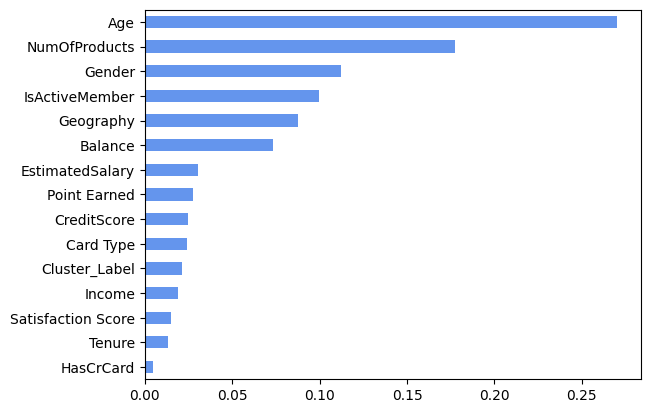

In [55]:
importances = pd.Series(grid_rf.best_estimator_.feature_importances_, index = X_train.columns)                                 
sorted_importances = importances.sort_values()   
sorted_importances.plot(kind='barh', color='cornflowerblue'); 
plt.show()

## Gradient Boosting with Random search

In [20]:
params_gb = {'learning_rate': [ 0.05, 0.1, 0.3, 0.5],
              'n_estimators': [300, 500, 600],
              'max_depth' :[ 6, 7, 8],
              'min_samples_leaf': [5, 10, 15]
             }

gb = GradientBoostingClassifier()

grid_gb = RandomizedSearchCV(gb, 
                             params_gb, 
                             cv = 3, 
                             n_jobs = -1,
                             scoring='roc_auc',
                            random_state=42)

In [21]:
grid_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.3, 0.5],
                                        'max_depth': [6, 7, 8],
                                        'min_samples_leaf': [5, 10, 15],
                                        'n_estimators': [300, 500, 600]},
                   random_state=42, scoring='roc_auc')

In [22]:
y_pred_gridgb = grid_gb.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred_gridgb, digits=4))
print("Accuracy score of Gradient Boosting with Random Search: ", grid_gb.score(X_test,y_test))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_gridgb):.2f}")

              precision    recall  f1-score   support

           0     0.8863    0.9169    0.9013      2695
           1     0.6273    0.5432    0.5822       694

    accuracy                         0.8404      3389
   macro avg     0.7568    0.7301    0.7418      3389
weighted avg     0.8333    0.8404    0.8360      3389

Accuracy score of Gradient Boosting with Random Search:  0.8418557153015778
ROC AUC: 0.73


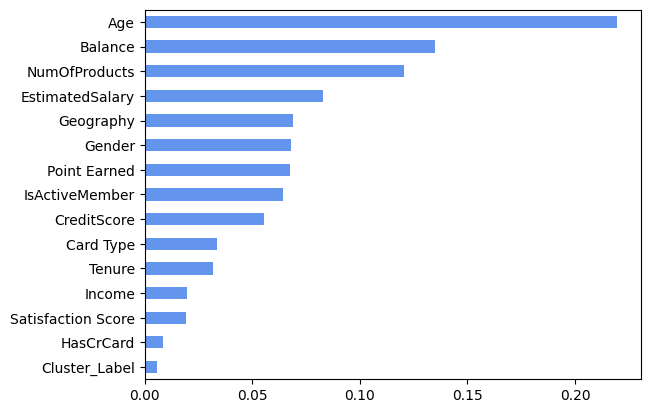

In [62]:
importances = pd.Series(grid_gb.best_estimator_.feature_importances_, index = X_train.columns)                                 
sorted_importances = importances.sort_values()   
sorted_importances.plot(kind='barh', color='cornflowerblue'); 
plt.show()

# Customer Retention Strategies

In [63]:
data=pd.concat([train,test], axis=0)
data_churn=data.query("Exited==1")

In [64]:
data_agg=data.groupby("Cluster_Label").mean("Exited")
data_agg

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Income,Geography,Gender,Card Type,Exited
Cluster_Label,,,,,,,,,,,,,,,
0,653.578243,39.711393,4.899108,80912.334823,1.457790,0.672958,0.478380,78546.814456,2.936513,588.696980,78560.069664,0.733137,0.980355,1.524628,0.373370
1,647.978641,40.949126,4.663689,80077.590254,1.488544,0.662136,0.394175,83144.226642,2.892816,594.324272,83459.483107,0.776206,0.202605,1.440113,0.584078
2,647.311287,40.099833,4.895577,83427.290326,1.433653,0.665971,0.423534,83550.404757,2.881494,598.668162,83700.906113,0.747997,0.873161,1.458666,0.430106
3,647.667949,40.754521,4.818930,81773.611637,1.492959,0.674721,0.417314,89840.824233,2.912428,605.993998,89921.294806,0.754859,0.017591,1.487603,0.546287
4,645.221159,40.187532,4.882566,77469.990505,1.535178,0.679255,0.448526,87911.897557,2.959907,607.917744,88219.042162,0.744820,0.055017,1.456622,0.382566
5,652.102061,37.889107,4.969578,76119.340857,1.529931,0.701668,0.514230,78182.222602,2.994112,617.342493,77670.574092,0.736241,1.000000,1.462523,0.180569


Text(0.5, 1.0, 'Number of Churned Customers in Each Cluster')

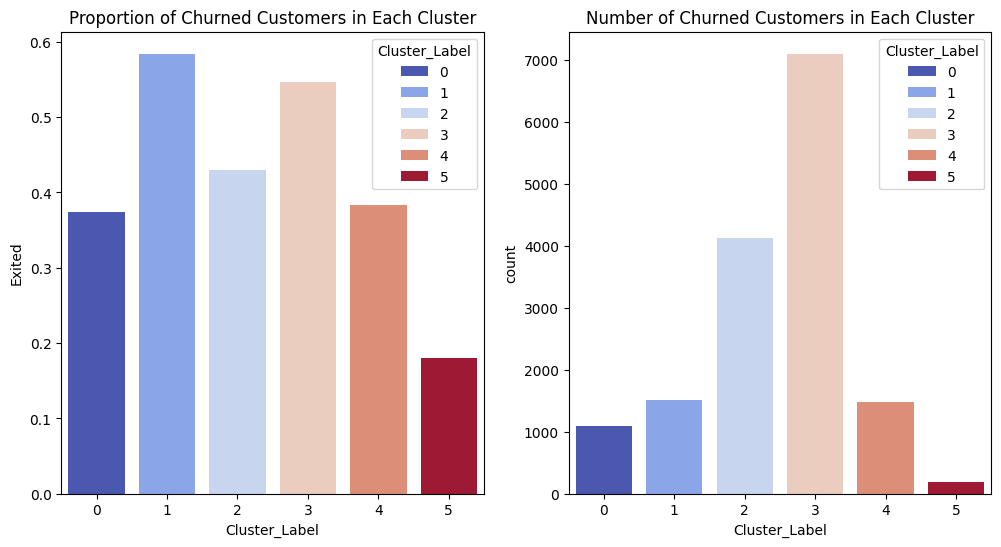

In [65]:
fig, ax=plt.subplots(1,2, figsize=(12,6))
sns.barplot(data_agg, x="Cluster_Label",y ="Exited", palette="coolwarm", hue="Cluster_Label", ax=ax[0])
ax[0].set_title("Proportion of Churned Customers in Each Cluster")

sns.countplot(data_churn, x="Cluster_Label", palette="coolwarm", hue="Cluster_Label", ax=ax[1])
plt.title("Number of Churned Customers in Each Cluster")

According to the plots, we can see that: 
1. A smaller proportion (<0.5) of customers in segment0, segment2, segment4, and segment5 have churned, and we can infer that future customers in these segment are more likely to stay compared to these in segment1 and segment3.
2. Most churned customers are classified as segment2 and segment3, with a few in segment0, segment1, segment4 and segment5.
3. Spending time and effort retaining customers in segment2 and segment4 should be our priority.

If a customer has been predicted as at risk to churn, we can apply corresponding retention strategis to mitigate their possibility to churn (more specific details refer to `A3-Behavorial-Patterns`).

Customers in segment0 are considered as “High-Value Email Converters.” Exclusive email campaigns, tiered loyalty program, and cross-sell initiatives are effective strategies to retain these customers.

Customers in segment1 are considered as “Disengaged Low-Value Floaters.” Reactivation offers, SEO retargeting & educational content, and Gamified App Onboarding are effective strategies to retain these customers.

Customers in segment2 are considered as “Referral-Savvy Digital Researchers.” Brand Storytelling & Thought Leadership, Early-Access or Pilot Programs, and Targeted Sub-Segmentation are effective strategies to retain these customers.

Customers in segment3 are considered as “Engaged Generalists & Growth Engine.” Referral & Social Proof, In-App Decision Tools, and Educational Webinars & Blogs are effective strategies to retain these customers.

Customers in segment4 are considered as “Social Media Loyalists with Retention Value.” Social Media Contests & Challenges, Exclusive Social Perks, and Retention & Advocacy Push are effective strategies to retain these customers.

Customers in segment5 are considered as “Low-Value Social Amplifiers.” Viral-Style Content & Giveaways, Community Recognition, and Soft Sales Approaches are effective strategies to retain these customers.
